In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('CreditCard1.csv',sep=';')

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
Unnamed: 0    30001 non-null object
X1            30001 non-null object
X2            30001 non-null object
X3            30001 non-null object
X4            30001 non-null object
X5            30001 non-null object
X6            30001 non-null object
X7            30001 non-null object
X8            30001 non-null object
X9            30001 non-null object
X10           30001 non-null object
X11           30001 non-null object
X12           30001 non-null object
X13           30001 non-null object
X14           30001 non-null object
X15           30001 non-null object
X16           30001 non-null object
X17           30001 non-null object
X18           30001 non-null object
X19           30001 non-null object
X20           30001 non-null object
X21           30001 non-null object
X22           30001 non-null object
X23           30001 non-null object
Y             30001 non-nul

In [5]:
eshopDesc = []

for i in df.columns:
    eshopDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2,replace=True).values
    ])

In [6]:
pd.DataFrame(data = eshopDesc, columns= [
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
] )

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,Unnamed: 0,object,0,0.0,30001,"[600, 29281]"
1,X1,object,0,0.0,82,"[460000, 550000]"
2,X2,object,0,0.0,3,"[2, 2]"
3,X3,object,0,0.0,8,"[1, 5]"
4,X4,object,0,0.0,5,"[1, 2]"
5,X5,object,0,0.0,57,"[36, 52]"
6,X6,object,0,0.0,12,"[0, 5]"
7,X7,object,0,0.0,12,"[3, 3]"
8,X8,object,0,0.0,12,"[0, -2]"
9,X9,object,0,0.0,12,"[8, -1]"


In [7]:
# Drop Unnamed column
df.drop(columns='Unnamed: 0',inplace=True)

In [8]:
# Convert datatype
cols = []
for i in df:
    cols.append(i)
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 24 columns):
X1     30000 non-null float64
X2     30000 non-null float64
X3     30000 non-null float64
X4     30000 non-null float64
X5     30000 non-null float64
X6     30000 non-null float64
X7     30000 non-null float64
X8     30000 non-null float64
X9     30000 non-null float64
X10    30000 non-null float64
X11    30000 non-null float64
X12    30000 non-null float64
X13    30000 non-null float64
X14    30000 non-null float64
X15    30000 non-null float64
X16    30000 non-null float64
X17    30000 non-null float64
X18    30000 non-null float64
X19    30000 non-null float64
X20    30000 non-null float64
X21    30000 non-null float64
X22    30000 non-null float64
X23    30000 non-null float64
Y      30000 non-null float64
dtypes: float64(24)
memory usage: 5.5 MB


In [10]:
df.isna().sum()

X1     1
X2     1
X3     1
X4     1
X5     1
X6     1
X7     1
X8     1
X9     1
X10    1
X11    1
X12    1
X13    1
X14    1
X15    1
X16    1
X17    1
X18    1
X19    1
X20    1
X21    1
X22    1
X23    1
Y      1
dtype: int64

In [11]:
df.dropna(inplace=True)

No null data

Data Description:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the -repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



# EDA

## Defining Problems

In financial industry there is a small chance that a user/customer will default, this will not only hurt the credit issuer itself, but the customer will also have a bad credit score which makes applying credit card a lot harder in the future. Solution needs to be created in order to minimize this risk

## Goals

In this project i will create a Machine Learning model that can further detect customer that are likely to default which can then prevent and minimize the cost of the default activity when customer is aplying for a credit card. It can be both benefit for the bank and customer

Because the high cost of default in the Machine Learning we will be minimizing the False Negative (will be briefly explained in ML Section)

### Check for Data Imbalance

In [12]:
df['Y'].unique()

array([1., 0.])

In [13]:
df['Y'].value_counts()

0.0    23364
1.0     6636
Name: Y, dtype: int64

There seems only 1 data that are default next month, because we want only to detect whether they're default or not, we can safely drop this data

In [14]:
i = df[(df.Y == 'default payment next month')].index

D:\Anaconda\Anaconda2\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [15]:
df.drop(i,inplace=True)

In [16]:
df['Y'].value_counts()

0.0    23364
1.0     6636
Name: Y, dtype: int64

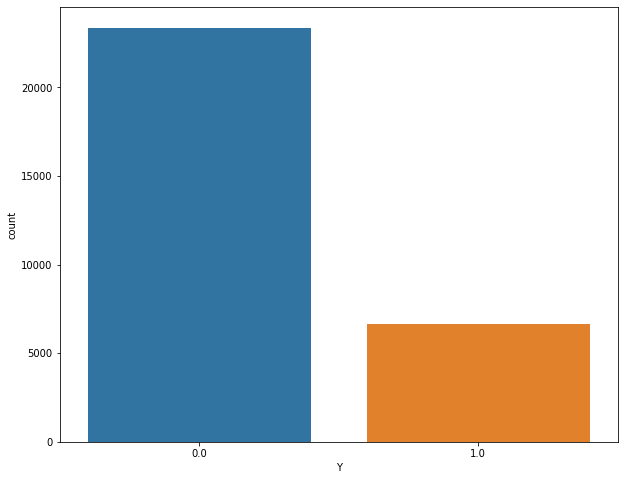

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(df['Y'])
plt.show()

In [18]:
pd.crosstab(index=df['Y'], columns='count', normalize=True) * 100

col_0,count
Y,
0.0,77.88
1.0,22.12


As expected the data is imbalance but not as imbalance as i thought to be, this indicate that there is about 22% default user which in my opinion is quite high

### Gender

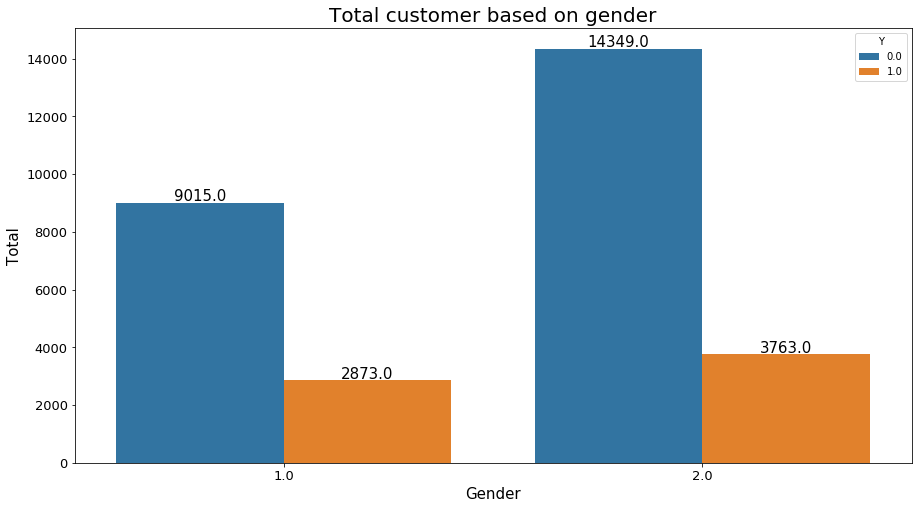

In [19]:
trip_by_gender = df.groupby(['X2','Y'],as_index=False)['X3'].count().rename(columns={'X3':'total'})

plt.figure(figsize=(15,8))
splot = sns.barplot(data=trip_by_gender, x='X2', y='total',hue='Y')

plt.title('Total customer based on gender',size=20)
plt.ylabel('Total',size=15)
plt.xlabel('Gender',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0,6), 
                   textcoords = 'offset points')
plt.show()

- Based on the graph, most of the credit card holder is Female
- However, if we look closely the ratio for default is higher for the male customer

### Credit amount distribution and outlier

In [20]:
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

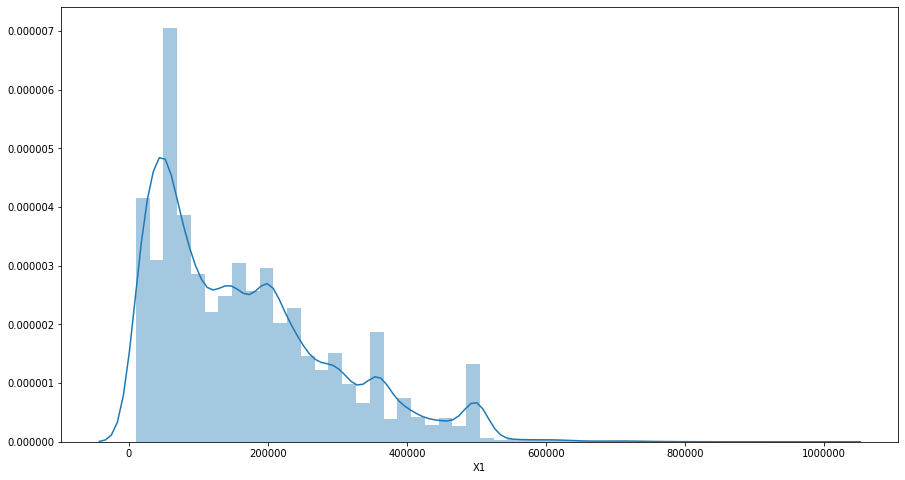

In [21]:
plt.figure(figsize=(15,8))
sns.distplot(df['X1'])
plt.show()

Based on the graph we have right skewed distribution where most of the credit card usage is around 100,000

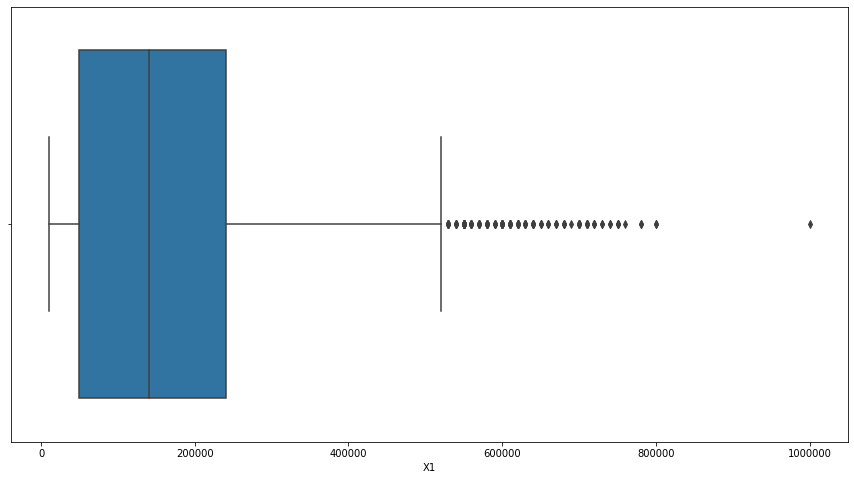

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(df['X1'])
plt.show()

In [23]:
Q1 = df['X1'].quantile(0.25)
Q3 = df['X1'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

print(f'the upper fence is {upper_fence}')
print(f'the lower fence is {lower_fence}')

the upper fence is 525000.0
the lower fence is -235000.0


With boxplot we can see there are few outlier where the amount is more than 525,000, however this is normal thing for a credit card user as there are VIP users that have high spending. Thus we wont dropping any outlier from here

### Education

In [24]:
df['X3'].unique()

array([2., 1., 3., 5., 4., 6., 0.])

There seems to be inconsistency based on the data we're given when there shoul've been only 4 unique value

### Correlation

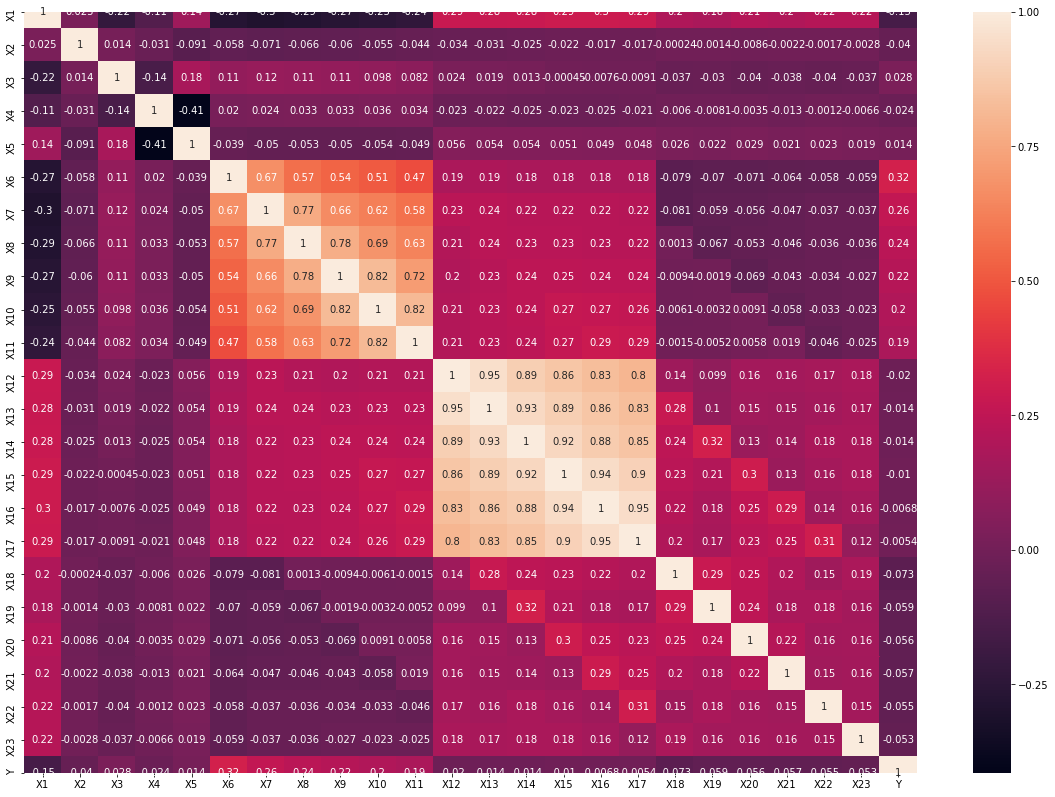

In [25]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Machine Learning

## Feature Engineering

### One Hot Encoding

In [26]:
df1 = df.copy()

In [27]:
### One Hot Encoding Column Gender, Education, Martial Status
df1 =  pd.get_dummies(data=df1, columns=['X2', 'X3','X4'])

### Splitting Data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df1.drop(columns='Y')
y = df1['Y']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .20, random_state = 42)

In [31]:
X_train.shape

(24000, 33)

In [32]:
X_test.shape

(6000, 33)

# ML Modelling

## 1. Logistic Regression

### 1A. Base Logistic Regression

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
LR = LogisticRegression()

In [35]:
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_predLR = LR.predict(X_test)

#### Evaluation Base Model (LR)

In [37]:
print(classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      4673
         1.0       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



In [38]:
cm_LR = confusion_matrix(y_test, y_predLR, labels=[1, 0])

In [39]:
df_LR = pd.DataFrame(cm_LR, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_LR

,Pred 1,Pred 0
Akt 1,0,1327
Akt 0,0,4673


- The base model using LR cant detect if the customer default (1), this might be the cause of imbalance data
- There are few ways how to handle imbalance data, it can be done by feture engineering using SMOTE, Random Oversampling or Undersampling, but in this limited time, we're focusing on using Parameter tuning, specifically 'class_weight'
- We want to focus on Recall Class 1 , where we focus to predict default customer correctly and minimize the False Negative (where we predict not default but the actual is default) because its more costly if the customer actually default and we dont have the resource to mitigate or prevent it, comparing if we misjudge customer default but the actual is not default, then the customer only has to call the Customer Service for confirmation

### 1B. LR With class_weight

In [40]:
LR_1 = LogisticRegression(class_weight={0 : .15, 1 : .85})

In [41]:
LR_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.15, 1: 0.85}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred_LR1 = LR_1.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred_LR1))

              precision    recall  f1-score   support

         0.0       0.88      0.25      0.39      4673
         1.0       0.25      0.87      0.39      1327

    accuracy                           0.39      6000
   macro avg       0.56      0.56      0.39      6000
weighted avg       0.74      0.39      0.39      6000



In [44]:
cm_LR_1 = confusion_matrix(y_test, y_pred_LR1 , labels=[1,0])

In [45]:
df_LR_1 = pd.DataFrame(cm_LR_1, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_LR_1

,Pred 1,Pred 0
Akt 1,1160,167
Akt 0,3502,1171


- Pretty good improvement compared to previous base model, i've played with the class weight a couple of time and this seems to be the best combination
- however this is still bad model even though we got decent amount of the Recall score, most of the prediction predict that the user is default even though its not

### 1C. LR with Hyper Parameter Tuning

LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,

In [46]:
param_LR = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'class_weight' : [{0:x, 1: 1 - x} for x in [.1,.15, .20, .25]]
}

In [47]:
LR_HP = LogisticRegression(random_state=42)

In [48]:
skf = StratifiedKFold(n_splits=3, random_state=42)

In [49]:
LR_GS= GridSearchCV(LR_HP, param_LR, cv=skf, n_jobs=-1, verbose=1, scoring='f1')

In [50]:
LR_GS.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   36.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.15, 1: 0.85},
                                          {0: 0.2, 1: 0.8},
                                          {0: 0.25, 1: 0.75}],
                         

In [51]:
LR_GS.best_params_

{'C': 0.01, 'class_weight': {0: 0.2, 1: 0.8}, 'penalty': 'l2'}

In [52]:
LR_Tuned = LR_GS.best_estimator_

In [53]:
y_pred_LR_Tuned = LR_Tuned.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred_LR_Tuned))

              precision    recall  f1-score   support

         0.0       0.83      0.64      0.72      4673
         1.0       0.30      0.55      0.39      1327

    accuracy                           0.62      6000
   macro avg       0.57      0.60      0.56      6000
weighted avg       0.72      0.62      0.65      6000



In [55]:
cm_LR_Tuned = confusion_matrix(y_test, y_pred_LR_Tuned, labels=[1,0])

In [56]:
df_LR_Tuned = pd.DataFrame(cm_LR_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_LR_Tuned

,Pred 1,Pred 0
Akt 1,736,591
Akt 0,1695,2978


- I've tried to set the scoring to recall, but the result will be very unbalanced, that is why i use f1 scoring

### 1D. LR with Scaling 

In [59]:
sc = RobustScaler()

In [98]:
num_col = df1[['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']]

In [99]:
sc_train = sc.fit_transform(num_col)

In [100]:
train_sc = pd.DataFrame(sc_train)

In [101]:
train_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.631579,-0.769231,-0.290695,-0.296584,-0.337391,-0.365126,-0.373848,-0.356074,-0.524214,-0.316775,-0.437424,-0.403524,-0.396930,-0.386374
1,-0.105263,-0.615385,-0.310071,-0.319150,-0.302730,-0.302419,-0.302504,-0.288055,-0.524214,-0.242141,-0.194411,-0.134508,-0.396930,0.128791
2,-0.263158,0.000000,0.107937,-0.117549,-0.113559,-0.090477,-0.065180,-0.031747,-0.145282,-0.122150,-0.194411,-0.134508,-0.132310,0.901539
3,-0.473684,0.230769,0.387339,0.443008,0.507883,0.177504,0.224139,0.260230,-0.024963,0.002400,-0.145808,-0.107606,-0.114051,-0.128791
4,-0.473684,1.769231,-0.216654,-0.254500,0.273859,0.036183,0.021506,0.042968,-0.024963,8.320614,1.992710,2.017621,-0.214607,-0.211475


In [102]:
df1.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X3_1.0,X3_2.0,X3_3.0,X3_4.0,X3_5.0,X3_6.0,X4_0.0,X4_1.0,X4_2.0,X4_3.0
1,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,0,1,0,0,0,0,0,1,0,0
2,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,0,1,0,0,0,0,0,0,1,0
3,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,0,1,0,0,0,0,0,0,1,0
4,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,0,1,0,0,0,0,0,1,0,0
5,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,0,1,0,0,0,0,0,1,0,0


In [103]:
df_scaled = pd.concat([df1, train_sc], axis=1)

In [104]:
df_scaled.isna().sum()

X1        1
X5        1
X6        1
X7        1
X8        1
X9        1
X10       1
X11       1
X12       1
X13       1
X14       1
X15       1
X16       1
X17       1
X18       1
X19       1
X20       1
X21       1
X22       1
X23       1
Y         1
X2_1.0    1
X2_2.0    1
X3_0.0    1
X3_1.0    1
X3_2.0    1
X3_3.0    1
X3_4.0    1
X3_5.0    1
X3_6.0    1
X4_0.0    1
X4_1.0    1
X4_2.0    1
X4_3.0    1
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
dtype: int64

In [105]:
df_scaled.dropna(inplace=True)

In [106]:
df_scaled.drop(columns=['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23'], inplace=True)

In [107]:
df_scaled.head()

,X6,X7,X8,X9,X10,X11,Y,X2_1.0,X2_2.0,X3_0.0,...,4,5,6,7,8,9,10,11,12,13
1,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0,0.0,1.0,0.0,...,-0.302730,-0.302419,-0.302504,-0.288055,-0.524214,-0.242141,-0.194411,-0.134508,-0.396930,0.128791
2,-1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,-0.113559,-0.090477,-0.065180,-0.031747,-0.145282,-0.122150,-0.194411,-0.134508,-0.132310,0.901539
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.507883,0.177504,0.224139,0.260230,-0.024963,0.002400,-0.145808,-0.107606,-0.114051,-0.128791
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.273859,0.036183,0.021506,0.042968,-0.024963,8.320614,1.992710,2.017621,-0.214607,-0.211475
5,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.652530,0.006554,0.031274,0.061595,0.099850,-0.046556,-0.277764,-0.134508,-0.132310,-0.180308


In [108]:
X_scaled = df_scaled.drop(columns='Y')
y_scaled = df_scaled['Y']

In [109]:
X_scaled.shape

(29999, 33)

In [110]:
y_scaled.shape

(29999,)

In [111]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_scaled, y_scaled, stratify = y, test_size = .20, random_state = 40)

ValueError: Found input variables with inconsistent numbers of samples: [29999, 30000]

In [79]:
X_trainS.shape

NameError: name 'X_trainS' is not defined

In [ ]:
X_testS.shape

In [ ]:
param_LR = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'class_weight' : [{0:x, 1: 1 - x} for x in [.1,.15, .20, .25]]
}

In [ ]:
LR_HP = LogisticRegression(random_state=42)

In [ ]:
skf = StratifiedKFold(n_splits=3, random_state=42)

In [ ]:
LR_GS= GridSearchCV(LR_HP, param_LR, cv=skf, n_jobs=-1, verbose=1, scoring='f1')

In [ ]:
LR_GS.fit(X_trainS, y_trainS)

In [ ]:
LR_GS.best_params_

In [ ]:
LR_Tuned = LR_GS.best_estimator_

In [ ]:
y_pred_LR_Tuned = LR_Tuned.predict(X_test)

In [ ]:
print(classification_report(y_testS, y_pred_LR_Tuned))

In [ ]:
cm_LR_Tuned = confusion_matrix(y_testS, y_pred_LR_Tuned, labels=[1,0])

In [ ]:
df_LR_Tuned = pd.DataFrame(cm_LR_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_LR_Tuned

Not much of a difference from previous model

### Splitting data using original df

In [57]:
X = df.drop(columns='Y')
y = df['Y']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .20, random_state = 42)

## Using Pipeline

For the rest of the model

In [59]:
num_columns = ['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']
cat_columns = ['X2','X3','X4','X6','X7','X8','X9','X10','X11']


numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler()),
    #('poly', PolynomialFeatures(degree=3, include_bias=False)),
    #('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())


preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categorical', categoric_pipeline, cat_columns)
])

pipe_RF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", preprocessor),
    ("algo", DecisionTreeClassifier())
])

In [ ]:
# Revised

num_columns = ['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']
cat_columns = ['X2','X3','X4']
cat_not_ohc = ['X6','X7','X8','X9','X10','X11']


numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler()),
    #('poly', PolynomialFeatures(degree=3, include_bias=False)),
    #('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())

cat_not_ohc_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categorical', categoric_pipeline, cat_columns),
    ('categorical', cat_not_ohc_pipeline, cat_not_ohc)
])

pipe_RF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", preprocessor),
    ("algo", DecisionTreeClassifier())
])

### Random Forest

In [80]:
pipe_RF.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                   

In [81]:
y_RF = pipe_RF.predict(X_test)

In [82]:
print(classification_report(y_test, y_RF))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4673
         1.0       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [83]:
cm_RF = confusion_matrix(y_test, y_RF, labels=[1,0])

In [84]:
df_RF = pd.DataFrame(cm_RF, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_RF

,Pred 1,Pred 0
Akt 1,482,845
Akt 0,275,4398


### RF with hyperparameter tuning

In [85]:
param_RF = {
    "n_estimators" : [100,300,700],
    "max_depth" : [5, 10, 25],
    "min_samples_leaf" : np.arange(1, 17, 5),
    "max_features" : [0.3, 0.5, 0.8],
    "class_weight" : [{0 : x, 1 : 1 - x} for x in [.1, .15, .20]]
}

In [86]:
RF_HP = RandomForestClassifier(random_state=42)

In [87]:
skf = StratifiedKFold(n_splits=3, random_state=42)

In [90]:
Model_RF = RandomizedSearchCV(RF_HP, param_RF, n_iter=10, cv=skf, n_jobs=-1, verbose=1,random_state=42) # Taking too long

In [91]:
Model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_spli...
                     

In [92]:
Model_RF.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 1,
 'max_features': 0.3,
 'max_depth': 25,
 'class_weight': {0: 0.15, 1: 0.85}}

In [93]:
RF_Tuned = Model_RF.best_estimator_

In [94]:
y_pred_RF_Tuned = Model_RF.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred_RF_Tuned))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      4673
         1.0       0.60      0.39      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [96]:
cm_RF_Tuned = confusion_matrix(y_test, y_pred_RF_Tuned, labels=[1,0])

In [97]:
df_RF_Tuned = pd.DataFrame(cm_RF_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_RF_Tuned

,Pred 1,Pred 0
Akt 1,516,811
Akt 0,341,4332


### Decision Tree

In [98]:
pipe_DT.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                   

In [99]:
y_DT = pipe_DT.predict(X_test)

In [100]:
print(classification_report(y_test, y_DT))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      4673
         1.0       0.38      0.40      0.39      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.73      6000



In [101]:
cm_DT = confusion_matrix(y_test, y_DT, labels=[1,0])

In [84]:
df_RF = pd.DataFrame(cm_RF, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_RF

,Pred 1,Pred 0
Akt 1,482,845
Akt 0,275,4398


### DT with hyperparameter tuning

In [85]:
param_RF = {
    "n_estimators" : [100,300,700],
    "max_depth" : [5, 10, 25],
    "min_samples_leaf" : np.arange(1, 17, 5),
    "max_features" : [0.3, 0.5, 0.8],
    "class_weight" : [{0 : x, 1 : 1 - x} for x in [.1, .15, .20]]
}

In [86]:
RF_HP = RandomForestClassifier(random_state=42)

In [87]:
skf = StratifiedKFold(n_splits=3, random_state=42)

In [90]:
Model_RF = RandomizedSearchCV(RF_HP, param_RF, n_iter=10, cv=skf, n_jobs=-1, verbose=1,random_state=42) # Taking too long

In [ ]:
Model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
Model_RF.best_params_

In [ ]:
RF_Tuned = Model_RF.best_estimator_

In [ ]:
y_pred_RF_Tuned = Model_RF.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_RF_Tuned))

In [ ]:
cm_RF_Tuned = confusion_matrix(y_test, y_pred_RF_Tuned, labels=[1,0])

In [ ]:
df_RF_Tuned = pd.DataFrame(cm_RF_Tuned, index=['Akt 1', 'Akt 0'], columns =  ['Pred 1', 'Pred 0'])
df_RF_Tuned

## Conclusion

- The current best model is LR with class_weight tunning, even though its very unbalance if we want to focus on minimizing the False Negative this is the current best one

* Because of machine limitation the i will post next best model that is balanced